In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test)=keras.datasets.mnist.load_data()

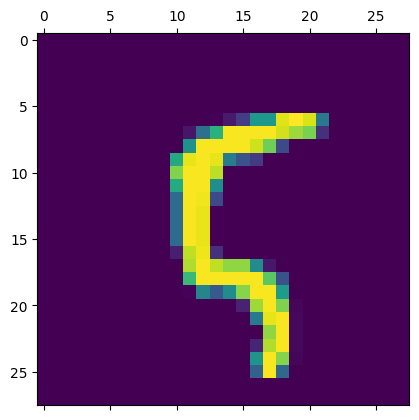

In [3]:
plt.matshow(X_train[100])

In [4]:
y_train[100]

5

In [5]:
X_train_norm=X_train.astype('float32')
X_train_norm=X_train_norm/255.0
X_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [6]:
X_test_norm=X_test.astype('float32')
X_test_norm=X_test_norm/255.0
X_test_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
X_train_flattened=X_train_norm.reshape(len(X_train_norm),28*28)

X_train_flattened.shape


(60000, 784)

In [8]:
X_test_flattened=X_test_norm.reshape(len(X_test_norm),28*28)

X_test_flattened.shape

(10000, 784)

In [9]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train_flattened,y_train,epochs=5)



Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4707 - accuracy: 0.8764
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3038 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2829 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2728 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2670 - accuracy: 0.9251


In [10]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2660 - accuracy: 0.9264


[0.26600492000579834, 0.9264000058174133]

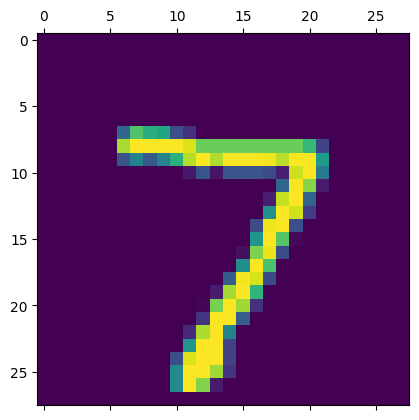

In [11]:
plt.matshow(X_test[0])

In [12]:
y_predict=model.predict(X_test_flattened)
y_predict[0]


313/313 [==============================] - 1s 1ms/step


array([2.3069881e-02, 4.3316555e-07, 8.4931985e-02, 9.6305048e-01,
       3.6608502e-03, 1.1762288e-01, 1.8398761e-06, 9.9986309e-01,
       1.1508694e-01, 6.5330887e-01], dtype=float32)

In [13]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [14]:
y_predicted_labels=[np.argmax(i) for i in y_predict]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [15]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

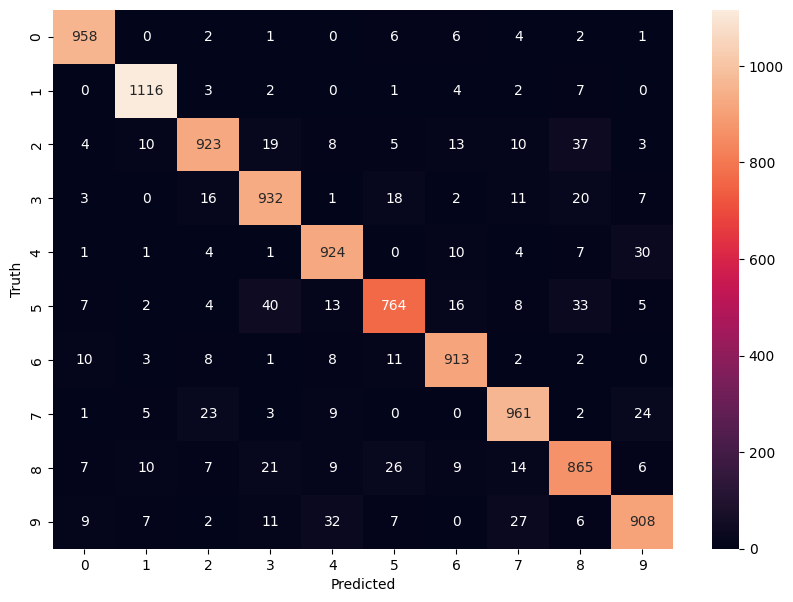

In [16]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [17]:

model=keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation='relu'),keras.layers.Dense(10,activation='sigmoid')])



model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

log_dir = "logs/fit/sgd" 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)



model.fit(X_train_flattened,y_train,epochs=5,callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6641 - accuracy: 0.8307
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3412 - accuracy: 0.9038
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2950 - accuracy: 0.9168
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2663 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2441 - accuracy: 0.9311


In [18]:
%tensorboard --logdir logs/fit/adam

%tensorboard --logdir logs/fit/sgd


UsageError: Line magic function `%tensorboard` not found.


In [19]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2316 - accuracy: 0.9334


[0.23156093060970306, 0.9333999752998352]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

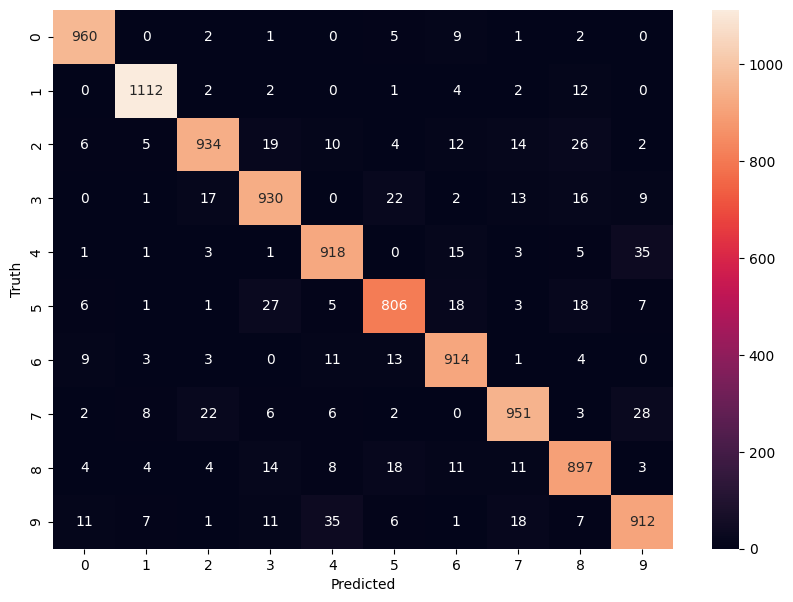

In [20]:
y_predict=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predict]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]